<a href="https://colab.research.google.com/github/f-flavia/DataCamp/blob/main/Introduction_to_Regression_with_statsmodels_in_Python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Regression
###Linear Regression
Linear regression is a statistical technique used to model the relationship between a continuous dependent variable and one or more continuous or categorical independent variables. The idea is to find a straight line that best fits the data to predict the value of the dependent variable based on the independent variables.

The response variable is numeric.
###Logistic Regression
On the other hand, logistic regression is a statistical analysis technique used to model the relationship between a binary dependent variable (i.e., one that takes only two possible values) and one or more continuous or categorical independent variables. The idea is to find an S-shaped curve that best fits the data and can predict the probability of the dependent variable occurring based on the independent variables.

The response variable is logical. (True or false values)

In summary, the main difference between linear regression and logistic regression is that linear regression is used to predict continuous numerical values, while logistic regression is used to predict the probability of a binary event.

Simple linear / logistic regression

There is only one explanatory variable.


###Correlation
Correlation is a statistical measure that describes the relationship between two quantitative variables. It measures the strength and direction of the linear relationship between the variables. There are different types of correlation, but the most common correlation is Pearson correlation.

Pearson correlation measures the linear relationship between two variables and ranges from -1 to 1. A correlation of -1 indicates a perfect negative linear relationship, meaning that as one variable increases, the other decreases proportionally. A correlation of 1 indicates a perfect positive linear relationship, meaning that as one variable increases, the other also increases proportionally. A correlation of 0 indicates no linear relationship between the variables.

For example, if we are studying the relationship between height and weight of individuals, we can use Pearson correlation to measure the strength and direction of the linear relationship between these two variables. If the correlation is positive and close to 1, it indicates that as height increases, weight also increases. If the correlation is negative and close to -1, it indicates that as height increases, weight decreases. If the correlation is close to 0, it indicates no linear relationship between height and weight.

### What is regression? (DataCamp)

- Statistical models to explore the relationship between a response variable and some explanatory variables.
- Given values of explanatory variables, you can predict the values of the response variable.
#### Response Variable (dependent variable)
- The variable that you want to predict.
#### Explanatory Variable (independent variables)
- The variable that explain how the response variable will change.

# Introduction to Regression with statsmodels in Python

In [ ]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

# Linear Regression

## taiwan_real_estate
Variable	              Meaning
- dist_to_mrt_station_m -	Distance to nearest MRT metro station, in meters.
- n_convenience	- No. of convenience stores in walking distance.
- house_age_years	- The age of the house, in years, in three groups.
- price_twd_msq	- House price per unit area, in New Taiwan dollars per meter squared.

In [ ]:
taiwan_real_estate = pd.read_csv('taiwan_real_estate2.csv')
taiwan_real_estate.head() 

,dist_to_mrt_m,n_convenience,house_age_years,price_twd_msq
0,84.87882,10,30 to 45,11.467474
1,306.59470,9,15 to 30,12.768533
2,561.98450,5,0 to 15,14.311649
3,561.98450,5,0 to 15,16.580938
4,390.56840,5,0 to 15,13.040847


In [ ]:
import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

In [ ]:
# DataCamp used seaborn, this one is the same as below 
# Visualizing two numeric variables
fig = px.scatter(data_frame=taiwan_real_estate,
    x='n_convenience',
    y='price_twd_msq', trendline="ols", width=800, height=550)

# Show your work
fig.show()

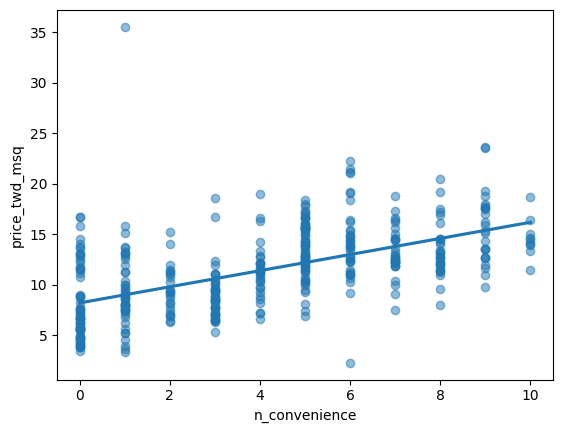

In [ ]:
# To make the straight lines we have to use regplot instead of scatter
# Visualizing two numeric variables

sns.regplot(x='n_convenience',
         y='price_twd_msq',
         data=taiwan_real_estate,
         ci=None,
         scatter_kws={'alpha': 0.5}) # makes the data points 50% transparent.
plt.show()

### Straight lines
- Intercept: the Y value at the point when X is zero. 8.26
- Slope: the amount the Y value increases if you increse X by one.
- Equation: Y = intercept + slope * X

Slope = horizontal = 5-3 = 2, vertical = 12.85-10.46 = 2.36, -- 2.36/2 = 1.18
Usei o plotly para pegar o valor na linha

In [ ]:
# Linear regression with ols()
# Import the ols function
from statsmodels.formula.api import ols

# Create the model object
mdl_price_vs_conv = ols('price_twd_msq ~ n_convenience', data=taiwan_real_estate)

# Fit the model
mdl_price_vs_conv = mdl_price_vs_conv.fit()

# Print the parameters of the fitted model
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


- On average, a house with zero convenience stores nearby had a price of 8.2242 TWD per square meter.
- The model had an n_convenience coefficient of 0.7981. What does this mean?
- If you increase the number of nearby convenience stores by one, then the expected increase in house price is 0.7981 TWD per square meter.
- Lively linear regression modeling! The intercept is positive, so a house with no convenience stores nearby still has a positive price. The coefficient for convenience stores is also positive, so as the number of nearby convenience stores increases, so does the price of the house

### Visualizing numeric vs. categorical
If the explanatory variable is categorical, the scatter plot that you used before to visualize the data doesn't make sense. Instead, a good option is to draw a histogram for each category.

The Taiwan real estate dataset has a categorical variable in the form of the age of each house. The ages have been split into 3 groups: 0 to 15 years, 15 to 30 years, and 30 to 45 years.

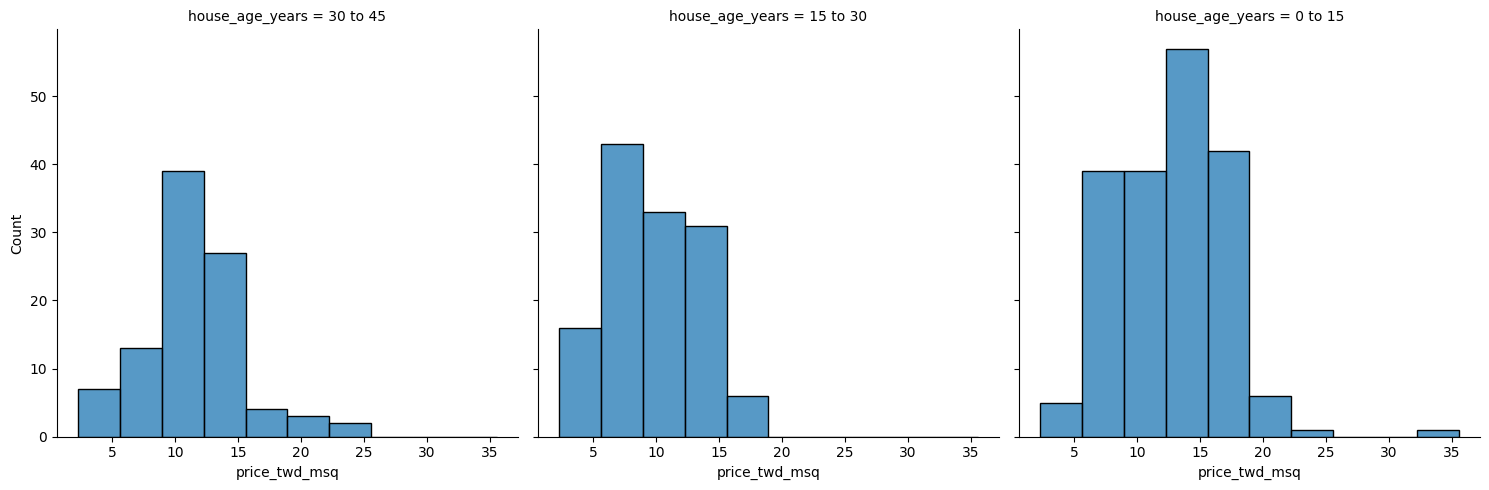

In [ ]:
# Histograms of price_twd_msq with 10 bins, split by the age of each house
sns.displot(data=taiwan_real_estate,
         x='price_twd_msq',
         col='house_age_years',
         bins=10)

# Show the plot
plt.show()

It appears that new houses are the most expensive on average, and the medium aged ones (15 to 30 years) are the cheapest.

In [ ]:
# Calculate the mean of price_twd_msq, grouped by house age
mean_price_by_age = taiwan_real_estate.groupby('house_age_years')['price_twd_msq'].mean()

# Print the result
print(mean_price_by_age)

house_age_years
0 to 15     12.637471
15 to 30     9.876743
30 to 45    11.393264
Name: price_twd_msq, dtype: float64


### Linear regression with a categorical explanatory variable

Great job calculating those grouped means! As mentioned in the last video, the means of each category will also be the coefficients of a linear regression model with one categorical variable. You'll prove that in this exercise.

To run a linear regression model with categorical explanatory variables, you can use the same code as with numeric explanatory variables. The coefficients returned by the model are different, however. Here you'll run a linear regression on the Taiwan real estate dataset.

In [ ]:
# Create the model, fit it
# responsible variable on the left and the explanatory variable on the right
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years', data=taiwan_real_estate).fit()

# Print the parameters of the fitted model
print(mdl_price_vs_age.params)

Intercept                      12.637471
house_age_years[T.15 to 30]    -2.760728
house_age_years[T.30 to 45]    -1.244207
dtype: float64


The intercept is the mean of house_age_years[0 to 15] above.
there are 02 negative coeficient, 
since the houses prices can't be negative. The coefficients for each category are calculated relative to the intercept. This way of displaying results can be useful for models with multiple explanatory variables, but for simple linear regression. It's just confusing.
By changing the formula slightly to append "+0", we specify that all the coefficients should be given relative to zero. Equivalently, it means we are fitting a linear regression without an intercept term. If you subtract 2.76 from 12.63, you get 9.87 which is the mean price of house_age_years[15 to 30].
When we only have a single, categorical explanatory variable, the linear regression coefficients are simply the means of each category.

In [ ]:
# NO intercept is included in the model
mdl_price_vs_age = ols('price_twd_msq ~ house_age_years + 0', data=taiwan_real_estate).fit()
print(mdl_price_vs_age.params)

house_age_years[0 to 15]     12.637471
house_age_years[15 to 30]     9.876743
house_age_years[30 to 45]    11.393264
dtype: float64


Categorical linear regression! The coefficients of the model are just the means of each category you calculated previously.

###Predicting house prices
Perhaps the most useful feature of statistical models like linear regression is that you can make predictions. That is, you specify values for each of the explanatory variables, feed them to the model, and get a prediction for the corresponding response variable. The code flow is as follows.

explanatory_data = pd.DataFrame({"explanatory_var": list_of_values})

predictions = model.predict(explanatory_data)

prediction_data = explanatory_data.assign(response_var=predictions)

Here, you'll make predictions for the house prices in the Taiwan real estate dataset.

In [ ]:
# Create explanatory_data 
explanatory_data = pd.DataFrame({'n_convenience': np.arange(0, 11)})

# Use mdl_price_vs_conv to predict with explanatory_data, call it price_twd_msq
price_twd_msq = mdl_price_vs_conv.predict(explanatory_data)

# Create prediction_data
prediction_data = explanatory_data.assign(
    price_twd_msq = price_twd_msq)

# Print the result
print(prediction_data)

# Having the predictions in a DataFrame will make it easier to visualize them.

    n_convenience  price_twd_msq
0               0       8.224237
1               1       9.022317
2               2       9.820397
3               3      10.618477
4               4      11.416556
5               5      12.214636
6               6      13.012716
7               7      13.810795
8               8      14.608875
9               9      15.406955
10             10      16.205035


Visualizing predictions

-The prediction DataFrame you created contains a column of explanatory variable values and a column of response variable values. That means you can plot it on the same scatter plot of response versus explanatory data values.
- Linear models don't know what is possible or not in real life. That means that they can give you predictions that don't make any sense when applied to your data. You need to understand what your data means in order to determine whether a prediction is nonsense or not.

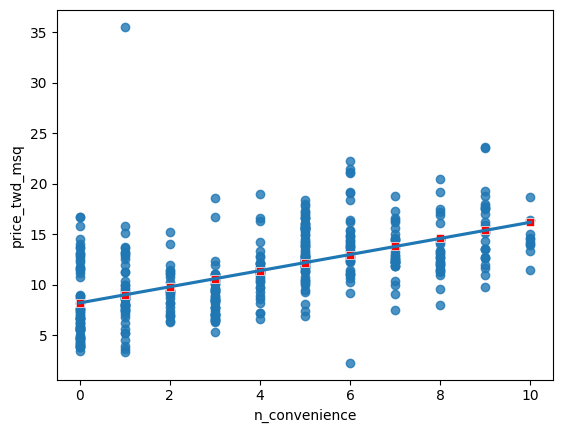

In [ ]:
# Create a new figure, fig
fig = plt.figure()

sns.regplot(x="n_convenience",
            y="price_twd_msq",
            data=taiwan_real_estate,
            ci=None)
# Add a scatter plot layer to the regplot
sns.scatterplot(x="n_convenience",
                y="price_twd_msq",
                data=prediction_data,
                color="red",
                marker="s")

# Show the layered plot
plt.show()

Extracting model elements

The model object created by ols() contains many elements. In order to perform further analysis on the model results, you need to extract its useful bits. The model coefficients, the fitted values, and the residuals are perhaps the most important pieces of the linear model object.

In [ ]:
# Print the model parameters of mdl_price_vs_conv
print(mdl_price_vs_conv.params)

Intercept        8.224237
n_convenience    0.798080
dtype: float64


In [ ]:
# Print the fitted values of mdl_price_vs_conv
print(mdl_price_vs_conv.fittedvalues)

0      16.205035
1      15.406955
2      12.214636
3      12.214636
4      12.214636
         ...    
409     8.224237
410    15.406955
411    13.810795
412    12.214636
413    15.406955
Length: 414, dtype: float64


In [ ]:
# Print the residuals of mdl_price_vs_conv
print(mdl_price_vs_conv.resid)

0     -4.737561
1     -2.638422
2      2.097013
3      4.366302
4      0.826211
         ...   
409   -3.564631
410   -0.278362
411   -1.526378
412    3.670387
413    3.927387
Length: 414, dtype: float64


In [ ]:
# Print a summary of mdl_price_vs_conv
print(mdl_price_vs_conv.summary())

                            OLS Regression Results                            
Dep. Variable:          price_twd_msq   R-squared:                       0.326
Model:                            OLS   Adj. R-squared:                  0.324
Method:                 Least Squares   F-statistic:                     199.3
Date:                Wed, 07 Jun 2023   Prob (F-statistic):           3.41e-37
Time:                        18:05:35   Log-Likelihood:                -1091.1
No. Observations:                 414   AIC:                             2186.
Df Residuals:                     412   BIC:                             2194.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         8.2242      0.285     28.857

Working with individual pieces of the model is often more useful than working with the whole model object at once.

Manually predicting house prices

You can manually calculate the predictions from the model coefficients. When making predictions in real life, it is better to use .predict(), but doing this manually is helpful to reassure yourself that predictions aren't magic - they are simply arithmetic.

In fact, for a simple linear regression, the predicted value is just the intercept plus the slope times the explanatory variable.

response = intercept + slope * explanatory



In [ ]:
# Get the coefficients of mdl_price_vs_conv
coeffs = mdl_price_vs_conv.params

# Get the intercept
intercept = coeffs[0]

# Get the slope
slope = coeffs[1]

# Manually calculate the predictions
price_twd_msq = intercept + slope * explanatory_data
print(price_twd_msq)

    n_convenience
0        8.224237
1        9.022317
2        9.820397
3       10.618477
4       11.416556
5       12.214636
6       13.012716
7       13.810795
8       14.608875
9       15.406955
10      16.205035


For simple linear regression, the prediction just involves one addition and one multiplication.

In [ ]:
sp500_yearly_returns = pd.read_csv('sp500_yearly_returns.csv')
sp500_yearly_returns.head()

,symbol,return_2018,return_2019
0,AAPL,-0.053902,0.889578
1,MSFT,0.207953,0.575581
2,AMZN,0.284317,0.230278
3,FB,-0.257112,0.565718
4,GOOGL,-0.008012,0.281762


### Plotting consecutive portfolio returns
Regression to the mean is also an important concept in investing. Here you'll look at the annual returns from investing in companies in the Standard and Poor 500 index (S&P 500), in 2018 and 2019.

The sp500_yearly_returns dataset contains three columns:

variable	meaning:

symbol:	Stock ticker symbol uniquely identifying the company.

return_2018:	A measure of investment performance in 2018.

return_2019:	A measure of investment performance in 2019.

A positive number for the return means the investment increased in value; negative means it lost value.

Just as with baseball home runs, a naive prediction might be that the investment performance stays the same from year to year, lying on the y equals x line.

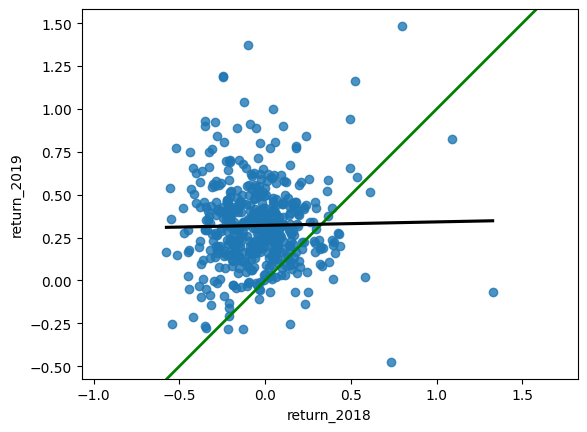

In [ ]:
# Create a new figure, fig
fig = plt.figure()

# Plot the first layer: y = x
plt.axline(xy1=(0,0), slope=1, linewidth=2, color="green")

# Add scatter plot with linear regression trend line
sns.regplot(x = 'return_2018', y = 'return_2019', data = sp500_yearly_returns, ci = None, line_kws={"color": "black"})

# Set the axes so that the distances along the x and y axes look the same
plt.axis("equal")

# Show the plot
plt.show()

The regression trend line looks very different to the y equals x line. As the financial advisors say, "Past performance is no guarantee of future results."

### Modeling consecutive returns
Let's quantify the relationship between returns in 2019 and 2018 by running a linear regression and making predictions. By looking at companies with extremely high or extremely low returns in 2018, we can see if their performance was similar in 2019.

In [ ]:
# Run a linear regression on return_2019 vs. return_2018 using sp500_yearly_returns
mdl_returns = ols('return_2019 ~ return_2018', data = sp500_yearly_returns).fit()

# Print the parameters
print(mdl_returns.params)

# Create a DataFrame with return_2018 at -1, 0, and 1 
explanatory_data = pd.DataFrame({"return_2018": [-1, 0, 1]})

# Use mdl_returns to predict with explanatory_data
print(mdl_returns.predict(explanatory_data))

Intercept      0.321321
return_2018    0.020069
dtype: float64
0    0.301251
1    0.321321
2    0.341390
dtype: float64


 Investments that gained a lot in value in 2018 on average gained only a small amount in 2019. Similarly, investments that lost a lot of value in 2018 on average also gained a small amount in 2019.

### Transforming the explanatory variable
If there is no straight-line relationship between the response variable and the explanatory variable, it is sometimes possible to create one by transforming one or both of the variables. Here, you'll look at transforming the explanatory variable.

You'll take another look at the Taiwan real estate dataset, this time using the distance to the nearest MRT (metro) station as the explanatory variable. You'll use code to make every commuter's dream come true: shortening the distance to the metro station by taking the square root. Take that, geography!

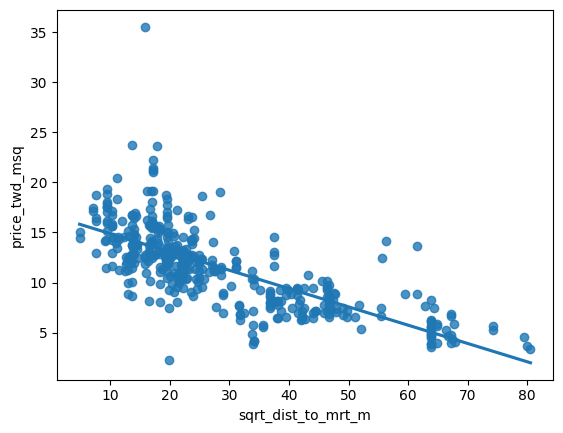

Intercept             16.709799
sqrt_dist_to_mrt_m    -0.182843
dtype: float64
   sqrt_dist_to_mrt_m  dist_to_mrt_m  price_twd_msq  n_impressions
0                 0.0              0      16.709799     279.217379
1                10.0            100      14.881370     221.455182
2                20.0            400      13.052942     170.379288
3                30.0            900      11.224513     125.989696
4                40.0           1600       9.396085      88.286406
5                50.0           2500       7.567656      57.269418
6                60.0           3600       5.739227      32.938732
7                70.0           4900       3.910799      15.294348
8                80.0           6400       2.082370       4.336266


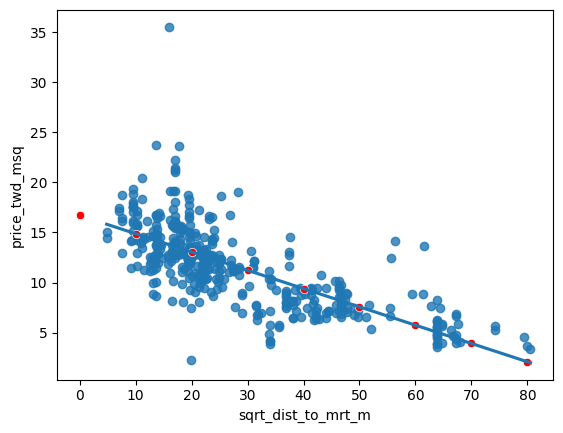

In [ ]:
# Create sqrt_dist_to_mrt_m
taiwan_real_estate["sqrt_dist_to_mrt_m"] = np.sqrt(taiwan_real_estate["dist_to_mrt_m"])
plt.figure()

# Plot using the transformed variable
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)
plt.show()

# Run a linear regression of price_twd_msq vs. square root of dist_to_mrt_m using taiwan_real_estate
mdl_price_vs_dist = ols("price_twd_msq ~ sqrt_dist_to_mrt_m", data=taiwan_real_estate).fit()

# Print the parameters
print(mdl_price_vs_dist.params)

explanatory_data = pd.DataFrame({"sqrt_dist_to_mrt_m": np.sqrt(np.arange(0, 81, 10) ** 2),
                                "dist_to_mrt_m": np.arange(0, 81, 10) ** 2})

# Create prediction_data by adding a column of predictions to explantory_data
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_dist.predict(explanatory_data), n_impressions=mdl_price_vs_dist.predict(explanatory_data) ** 2)

# Print the result
print(prediction_data)

# Use mdl_price_vs_dist to predict explanatory_data
prediction_data = explanatory_data.assign(price_twd_msq = mdl_price_vs_dist.predict(explanatory_data))

fig = plt.figure()
sns.regplot(x="sqrt_dist_to_mrt_m", y="price_twd_msq", data=taiwan_real_estate, ci=None)

# Add a layer of your prediction points
sns.scatterplot(data = prediction_data, x="sqrt_dist_to_mrt_m", y="price_twd_msq", color="red")
plt.show()

By transforming the explanatory variable, the relationship with the response variable became linear, and so a linear regression became an appropriate model.

In [ ]:
ad_conversion = pd.read_csv('ad_conversion_data.csv')
ad_conversion.head()

,spent_usd,n_impressions,n_clicks
0,1.43,7350,1
1,1.82,17861,2
2,1.25,4259,1
3,1.29,4133,1
4,4.77,15615,3


###Transforming the response variable too

The response variable can be transformed too, but this means you need an extra step at the end to undo that transformation. That is, you "back transform" the predictions.

In the video, you saw the first step of the digital advertising workflow: spending money to buy ads, and counting how many people see them (the "impressions"). The next step is determining how many people click on the advert after seeing it.

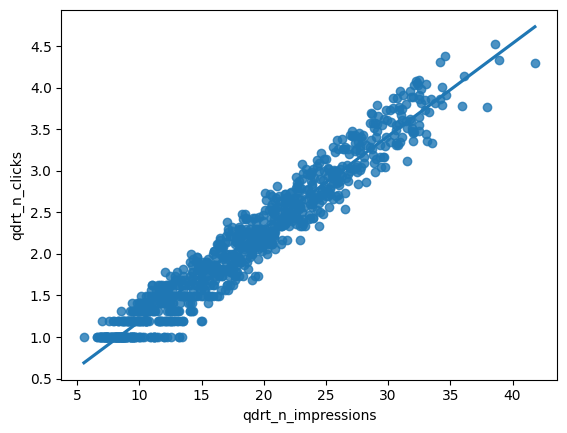

   qdrt_n_impressions  n_impressions  qdrt_n_clicks
0            0.000000            0.0       0.071748
1           26.591479       500000.0       3.037576
2           31.622777      1000000.0       3.598732
3           34.996355      1500000.0       3.974998
4           37.606031      2000000.0       4.266063
5           39.763536      2500000.0       4.506696
6           41.617915      3000000.0       4.713520


/usr/local/lib/python3.10/dist-packages/statsmodels/base/model.py:127: ValueWarning:

unknown kwargs ['ci']



In [ ]:
# Create qdrt_n_impressions and qdrt_n_clicks
ad_conversion["qdrt_n_impressions"] = ad_conversion['n_impressions'] ** 0.25
ad_conversion["qdrt_n_clicks"] = ad_conversion['n_clicks'] ** 0.25

plt.figure()

# Plot using the transformed variables
sns.regplot(x = 'qdrt_n_impressions', y = 'qdrt_n_clicks', data = ad_conversion, ci = None)
plt.show()

# Run a linear regression of your transformed variables
mdl_click_vs_impression = ols('qdrt_n_clicks ~ qdrt_n_impressions', data = ad_conversion).fit()

mdl_click_vs_impression = ols("qdrt_n_clicks ~ qdrt_n_impressions", data=ad_conversion, ci=None).fit()

explanatory_data = pd.DataFrame({"qdrt_n_impressions": np.arange(0, 3e6+1, 5e5) ** .25,
                                 "n_impressions": np.arange(0, 3e6+1, 5e5)})

# Complete prediction_data
prediction_data = explanatory_data.assign(
    qdrt_n_clicks = mdl_click_vs_impression.predict(explanatory_data)
)

# Print the result
print(prediction_data)

Since the response variable has been transformed, you'll now need to back-transform the predictions to correctly interpret your results.

### Back transformation
In the previous exercise, you transformed the response variable, ran a regression, and made predictions. But you're not done yet! In order to correctly interpret and visualize your predictions, you'll need to do a back-transformation.

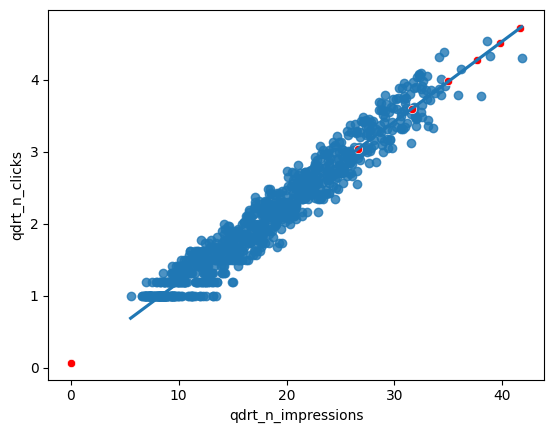

In [ ]:
# Back transform qdrt_n_clicks
prediction_data["n_clicks"] = prediction_data["qdrt_n_clicks"] ** 4

# Plot the transformed variables
fig = plt.figure()
sns.regplot(x="qdrt_n_impressions", y="qdrt_n_clicks", data=ad_conversion, ci=None)

# Add a layer of your prediction points
sns.scatterplot(data=prediction_data, x="qdrt_n_impressions", y="qdrt_n_clicks", color='red')
plt.show()

Notice that your back-transformed predictions nicely follow the trend line and allow you to make more accurate predictions.

### Coefficient of determination
The coefficient of determination is a measure of how well the linear regression line fits the observed values. For simple linear regression, it is equal to the square of the correlation between the explanatory and response variables.

Here, you'll take another look at the second stage of the advertising pipeline: modeling the click response to impressions.

### Coefficient of determination Sometimes called "r-squared" or "R-squared".

The proportion of the variance in the response variable that is predictable from the explanatory variable:
### 1 means a perfect fit
### 0 means the worst possible fit

Pipeline:
a linear sequence of specialized modules used for pipelining.

Pipelining
a form of computer organization in which successive steps of an instruction sequence are executed in turn by a sequence of modules able to operate concurrently, so that another instruction can be begun before the previous one is finished.

In [ ]:
# Run a linear regression of your variables
click_vs_impression = ols('n_clicks ~ n_impressions', data = ad_conversion).fit()

# Print a summary of mdl_click_vs_impression_orig
print(click_vs_impression.summary())

# Print a summary of mdl_click_vs_impression_trans
print(mdl_click_vs_impression.summary())

                            OLS Regression Results                            
Dep. Variable:               n_clicks   R-squared:                       0.892
Model:                            OLS   Adj. R-squared:                  0.891
Method:                 Least Squares   F-statistic:                     7683.
Date:                Wed, 07 Jun 2023   Prob (F-statistic):               0.00
Time:                        18:05:38   Log-Likelihood:                -4126.7
No. Observations:                 936   AIC:                             8257.
Df Residuals:                     934   BIC:                             8267.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
Intercept         1.6829      0.789      2.133

In [ ]:
# Print the coeff of determination for mdl_click_vs_impression_orig
print(click_vs_impression.rsquared)

# Print the coeff of determination for mdl_click_vs_impression_trans
print(mdl_click_vs_impression.rsquared)

0.8916134973508041
0.9445272817143905


### Question

mdl_click_vs_impression_orig has a coefficient of determination of 0.89. Which statement about the model is true?

### Answer:

The number of impressions explains 89% of the variability in the number of clicks.

### Question

Which model does the coefficient of determination suggest gives a better fit?

### Answer:

The transformed model, mdl_click_vs_impression_trans.


### The transformed model has a higher coefficient of determination than the original model, suggesting that it gives a better fit to the data.

### Residual standard error
Residual standard error (RSE) is a measure of the typical size of the residuals. Equivalently, it's a measure of how wrong you can expect predictions to be. Smaller numbers are better, with zero being a perfect fit to the data.

In [ ]:
# Calculate mse_orig for mdl_click_vs_impression_orig
mse_orig = click_vs_impression.mse_resid

# Calculate rse_orig for mdl_click_vs_impression_orig and print it
rse_orig = np.sqrt(mse_orig)
print("RSE of original model: ", rse_orig)

# Calculate mse_trans for mdl_click_vs_impression_trans
mse_trans = mdl_click_vs_impression.mse_resid

# Calculate rse_trans for mdl_click_vs_impression_trans and print it
rse_trans = np.sqrt(mse_trans)
print("RSE of transformed model: ", rse_trans)

RSE of original model:  19.905838862478138
RSE of transformed model:  0.19690640896875722


### Question

mdl_click_vs_impression_orig has an RSE of about 20. Which statement is true?

### Answer

The typical difference between observed number of clicks and predicted number of clicks is 20.

### Question

Which model does the RSE suggest gives more accurate predictions? mdl_click_vs_impression_orig has an RSE of about 20, mdl_click_vs_impression_trans has an RSE of about 0.2.

### Answer
The transformed model, mdl_click_vs_impression_trans.

### RSE is a measure of accuracy for regression models. It even works on other other statistical model types like regression trees, so you can compare accuracy across different classes of models.

### Accuracy
Accuracy is a metric used in various fields, including statistics and machine learning, which indicates the proportion of correct predictions made by a model out of the total predictions made. In other words, accuracy measures the ability of the model to correctly classify examples from a dataset.

For example, if a classification model was trained to distinguish between dogs and cats and achieved an accuracy of 90%, it means that it correctly classified 90% of the examples in the evaluation dataset. Accuracy is an important metric for evaluating the performance of machine learning models and can be used in conjunction with other metrics, depending on the analysis objective.

Accuracy is commonly used in classification problems and represents the proportion of samples that were correctly classified by the model.

To use accuracy, you first need to have a test dataset with known labels for your samples. Then, you need to have a trained model that predicts the labels for those samples.

Once the model has made its predictions, you can compare them with the known labels to calculate accuracy. The formula for calculating accuracy is:

accuracy = (number of correctly classified samples / total number of samples) * 100%

For example, if you have a test dataset with 100 samples and your model correctly classified 80 samples, the accuracy would be 80%.

Accuracy is a simple and easy-to-understand measure, but it may not be the best choice in all cases. In some cases, classes may be imbalanced, meaning that one class has many more samples than the other. In these cases, accuracy may not be a good performance measure because the model can perform well on the class with more samples and poorly on the class with fewer samples, but the accuracy can be high simply due to the large number of samples from the majority class.

In a good model, the residuals should have a trend line close to zero.

If the residuals from the model are normally distributed, then the points will track the line on the Q-Q plot. In this case, neither model is perfect, but the transformed model is closer.

In a good model, the size of the residuals shouldn't change much as the fitted values change.

### Drawing diagnostic plots

It's time for you to draw these diagnostic plots yourself using the Taiwan real estate dataset and the model of house prices versus number of convenience stores.

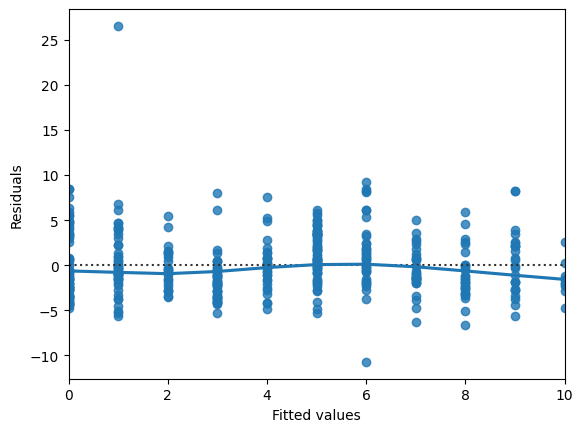

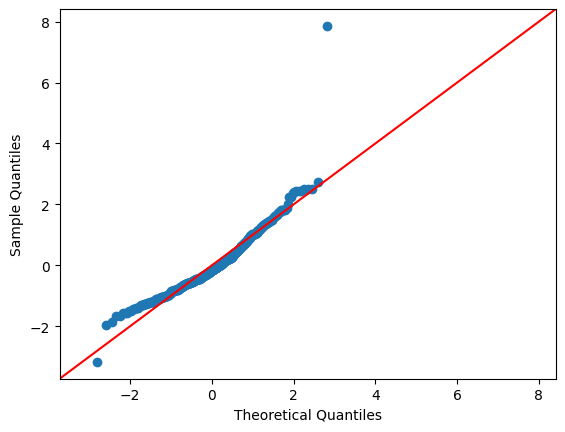

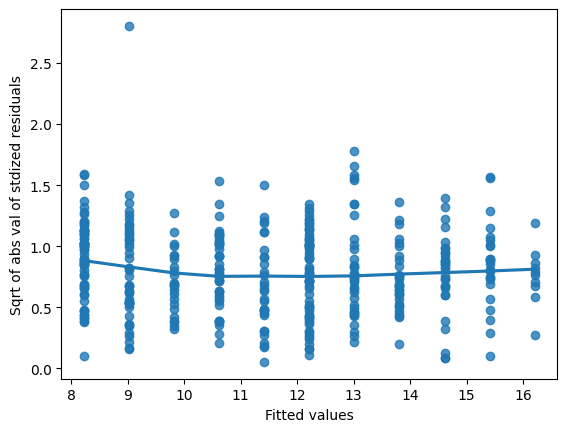

In [ ]:
# Create the residuals versus fitted values plot. Add a lowess argument to visualize the trend of the residuals.
# Plot the residuals vs. fitted values
sns.residplot(x='n_convenience', y='price_twd_msq', data=taiwan_real_estate, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Residuals")

# Show the plot
plt.show()

# Import qqplot
from statsmodels.api import qqplot

# Create the Q-Q plot of the residuals
qqplot(data=mdl_price_vs_conv.resid, fit=True, line="45")

# Show the plot
plt.show()

# Preprocessing steps
model_norm_residuals = mdl_price_vs_conv.get_influence().resid_studentized_internal
model_norm_residuals_abs_sqrt = np.sqrt(np.abs(model_norm_residuals))

# Create the scale-location plot
sns.regplot(x=mdl_price_vs_conv.fittedvalues, y=model_norm_residuals_abs_sqrt, ci=None, lowess=True)
plt.xlabel("Fitted values")
plt.ylabel("Sqrt of abs val of stdized residuals")

# Show the plot
plt.show()

These three diagnostic plots are excellent for sanity-checking the quality of your models.

### Leverage (alavancagem)

Leverage measures how unusual or extreme the explanatory variables are for each observation. Very roughly, high leverage means that the explanatory variable has values that are different from other points in the dataset. In the case of simple linear regression, where there is only one explanatory value, this typically means values with a very high or very low explanatory value.

Observations with a large distance to the nearest MRT station have the highest leverage, because most of the observations have a short distance, so long distances are more extreme.

Highly leveraged points are the ones with explanatory variables that are furthest away from the others.

# Influence

Influence measures how much a model would change if each observation was left out of the model calculations, one at a time. That is, it measures how different the prediction line would look if you would run a linear regression on all data points except that point, compared to running a linear regression on the whole dataset.

The standard metric for influence is Cook's distance, which calculates influence based on the residual size and the leverage of the point.

Observations far away from the trend line have high influence, because they have large residuals and are far away from other observations.

The majority of the influential houses were those with prices that were much higher than the model predicted (and one with a price that was much lower).


In [ ]:
# Create summary_info
summary_info = mdl_price_vs_dist.get_influence().summary_frame()

# Add the hat_diag column to taiwan_real_estate, name it leverage
taiwan_real_estate["leverage"] = summary_info['hat_diag']

# Sort taiwan_real_estate by leverage in descending order and print the head
print(taiwan_real_estate.sort_values('leverage', ascending = False).head())

# Add the cooks_d column to taiwan_real_estate, name it cooks_dist
taiwan_real_estate["cooks_dist"] = summary_info["cooks_d"]

# Sort taiwan_real_estate by cooks_dist in descending order and print the head.
print(taiwan_real_estate.sort_values('cooks_dist', ascending = False).head())



     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
347       6488.021              1        15 to 30       3.388805   
116       6396.283              1        30 to 45       3.691377   
249       6306.153              1        15 to 30       4.538578   
255       5512.038              1        30 to 45       5.264750   
8         5512.038              1        30 to 45       5.688351   

     sqrt_dist_to_mrt_m  leverage  
347           80.548253  0.026665  
116           79.976765  0.026135  
249           79.411290  0.025617  
255           74.243101  0.021142  
8             74.243101  0.021142  
     dist_to_mrt_m  n_convenience house_age_years  price_twd_msq  \
270       252.5822              1         0 to 15      35.552194   
148      3780.5900              0        15 to 30      13.645991   
228      3171.3290              0         0 to 15      14.099849   
220       186.5101              9        30 to 45      23.691377   
113       393.2606              6  

 Leverage and influence are important concepts for determining whether your model is overly affected by some unusual data points.

# Logistic Regression

In [ ]:
churn = pd.read_csv('Customer_churn_data.csv')
churn.head()

,has_churned,time_since_first_purchase,time_since_last_purchase
0,0,-1.089221,-0.721322
1,0,1.182983,3.634435
2,0,-0.846156,-0.427582
3,0,0.086942,-0.535672
4,0,-1.166642,-0.672640


### Exploring the explanatory variables
When the response variable is logical, all the points lie on the 
 and 
 lines, making it difficult to see what is happening. In the video, until you saw the trend line, it wasn't clear how the explanatory variable was distributed on each line. This can be solved with a histogram of the explanatory variable, grouped by the response.

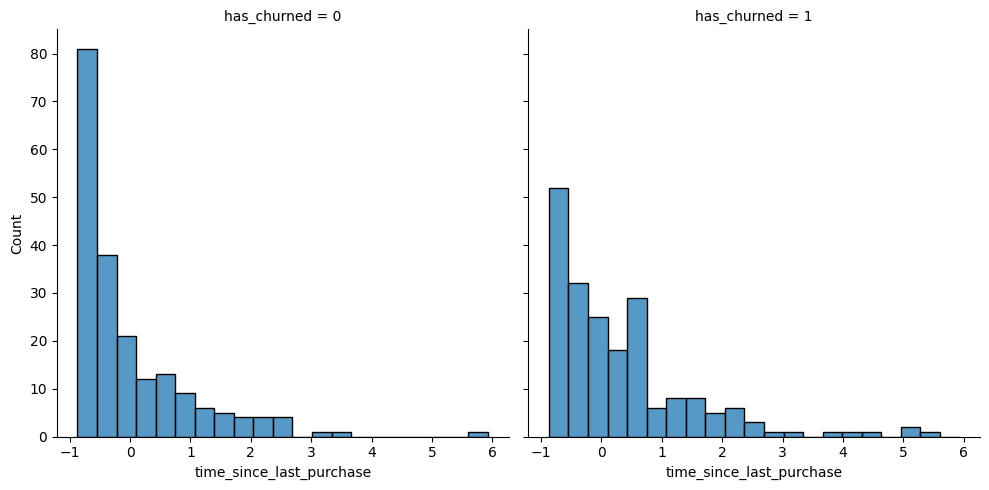

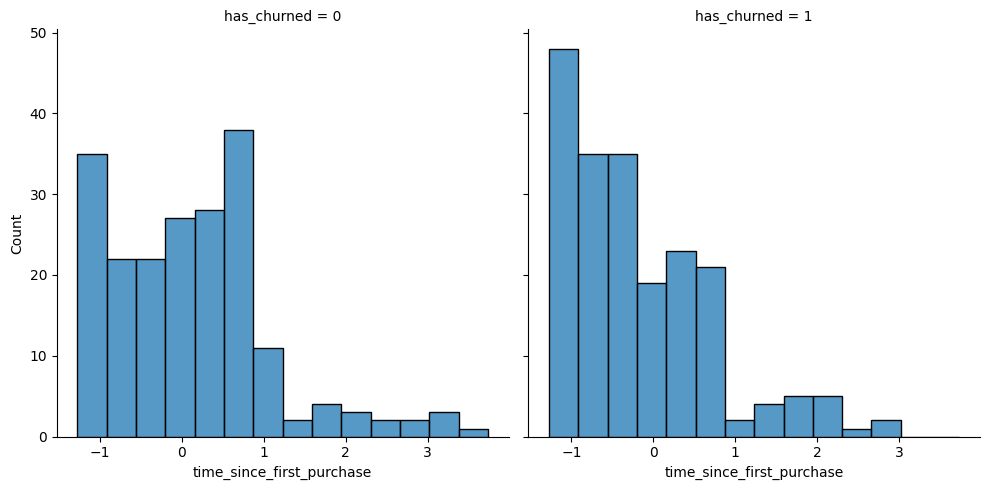

In [ ]:
# Create the histograms of time_since_last_purchase split by has_churned
sns.displot(data = churn, x="time_since_last_purchase", col="has_churned")

plt.show()

# Redraw the plot with time_since_first_purchase
sns.displot(data = churn, x="time_since_first_purchase", col="has_churned")

plt.show()

In the time_since_last_purchase plot, the distribution of churned customers was further right than the distribution of non-churned customers (churners typically have longer times since their last purchase). For time_since_first_purchase the opposite is true: churners have a shorter length of relationship.

### Visualizing linear and logistic models
As with linear regressions, regplot() will draw model predictions for a logistic regression without you having to worry about the modeling code yourself. To see how the predictions differ for linear and logistic regressions, try drawing both trend lines side by side. Spoiler: you should see a linear (straight line) trend from the linear model, and a logistic (S-shaped) trend from the logistic model.

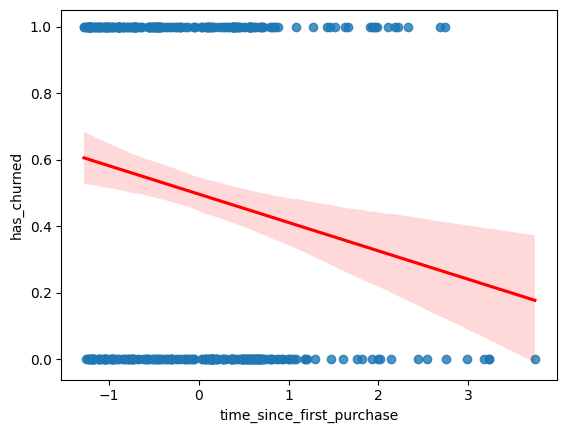

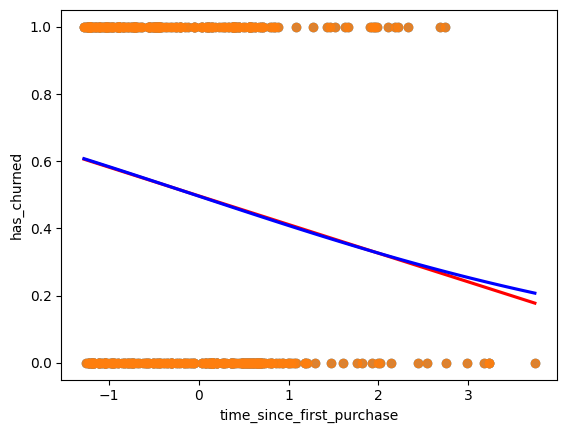

In [ ]:
# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(data = churn, x="time_since_first_purchase", y="has_churned", line_kws={"color": "red"})

plt.show()

# Draw a linear regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "red"})

# Draw a logistic regression trend line and a scatter plot of time_since_first_purchase vs. has_churned
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn, 
            ci=None,
            line_kws={"color": "blue"},
            logistic=True)

plt.show()

The two models give similar predictions in some places, but notice the slight curve in the logistic model trend.

### Logistic regression with logit()
Logistic regression requires another function from statsmodels.formula.api: logit(). It takes the same arguments as ols(): a formula and data argument. You then use .fit() to fit the model to the data.

Here, you'll model how the length of relationship with a customer affects churn.

In [ ]:
# Import logit
from statsmodels.formula.api import logit

# Fit a logistic regression of churn vs. length of relationship using the churn dataset
mdl_churn_vs_relationship = logit("has_churned ~ time_since_first_purchase", data=churn).fit()

# Print the parameters of the fitted model
print(mdl_churn_vs_relationship.params)

Optimization terminated successfully.
         Current function value: 0.679663
         Iterations 4
Intercept                   -0.015185
time_since_first_purchase   -0.354795
dtype: float64


The code to run a logistic regression is a simple change from the code to run a linear regression. Now we can make some predictions with the model.

### Probabilities
There are four main ways of expressing the prediction from a logistic regression model – we'll look at each of them over the next four exercises. Firstly, since the response variable is either "yes" or "no", you can make a prediction of the probability of a "yes". Here, you'll calculate and visualize these probabilities.

In [ ]:
# Create explanatory_data 
explanatory_data = pd.DataFrame({'time_since_first_purchase': np.arange(-1, 6.25, 0.25)})

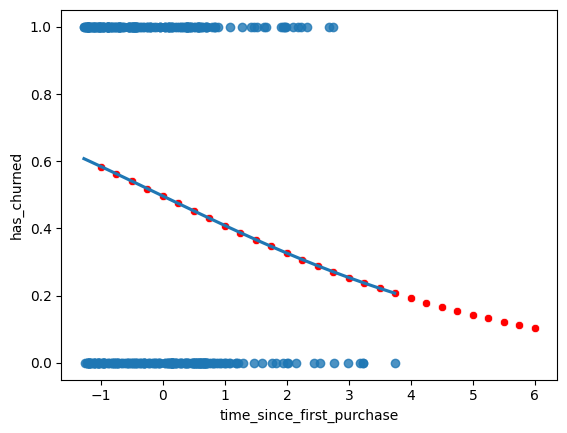

In [ ]:
# Create prediction_data
prediction_data = explanatory_data.assign(has_churned = mdl_churn_vs_relationship.predict(explanatory_data))

fig = plt.figure()

# Create a scatter plot with logistic trend line
sns.regplot(x="time_since_first_purchase", y="has_churned", data=churn, ci=None, logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase", y="has_churned", data=prediction_data, color="red")

plt.show()

The probability of a positive response is a natural way of thinking about predictions.

### Most likely outcome
When explaining your results to a non-technical audience, you may wish to side-step talking about probabilities and simply explain the most likely outcome. That is, rather than saying there is a 60% chance of a customer churning, you say that the most likely outcome is that the customer will churn. The trade-off here is easier interpretation at the cost of nuance.

   time_since_first_purchase  has_churned  most_likely_outcome
0                      -1.00     0.584096                  1.0
1                      -0.75     0.562401                  1.0
2                      -0.50     0.540465                  1.0
3                      -0.25     0.518370                  1.0
4                       0.00     0.496204                  0.0


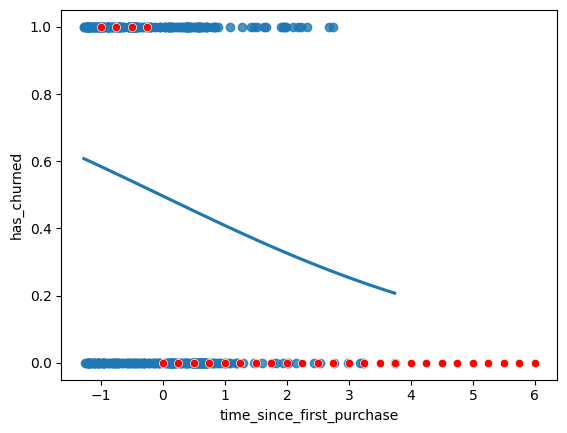

In [ ]:
# Update prediction data by adding most_likely_outcome
prediction_data["most_likely_outcome"] = np.round(prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

# Update prediction data by adding most_likely_outcome

fig = plt.figure()

# Create a scatter plot with logistic trend line (from previous exercise)
sns.regplot(x="time_since_first_purchase",
            y="has_churned",
            data=churn,
            ci=None,
            logistic=True)

# Overlay with prediction_data, colored red
sns.scatterplot(x="time_since_first_purchase", y="most_likely_outcome", data=prediction_data, color="red")

plt.show()

Providing the most likely response is a great way to share the model results with a non-technical audience.

### Odds ratio
Odds ratios compare the probability of something happening with the probability of it not happening. This is sometimes easier to reason about than probabilities, particularly when you want to make decisions about choices. For example, if a customer has a 20% chance of churning, it may be more intuitive to say "the chance of them not churning is four times higher than the chance of them churning".

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio
0                      -1.00     0.584096                  1.0    1.404400
1                      -0.75     0.562401                  1.0    1.285197
2                      -0.50     0.540465                  1.0    1.176111
3                      -0.25     0.518370                  1.0    1.076284
4                       0.00     0.496204                  0.0    0.984930


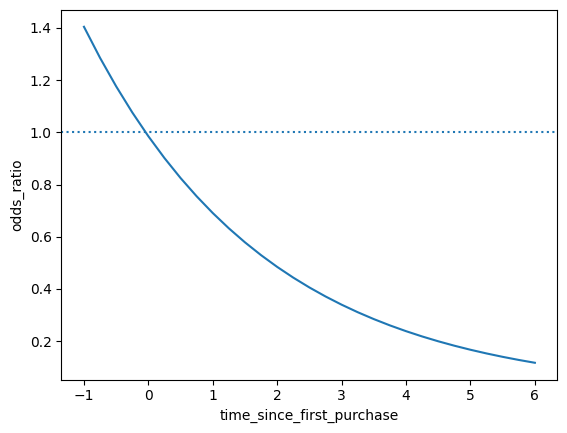

In [ ]:
# Update prediction data with odds_ratio
prediction_data["odds_ratio"] = prediction_data["has_churned"] / (1 - prediction_data["has_churned"])

# Print the head
print(prediction_data.head())

fig = plt.figure()

# Create a line plot of odds_ratio vs time_since_first_purchase
sns.lineplot(x="time_since_first_purchase", y="odds_ratio", data=prediction_data)

# Add a dotted horizontal line at odds_ratio = 1
plt.axhline(y=1, linestyle="dotted")

plt.show()

Odds ratios provide an alternative to probabilities that make it easier to compare positive and negative responses.

### Log odds ratio

One downside to probabilities and odds ratios for logistic regression predictions is that the prediction lines for each are curved. This makes it harder to reason about what happens to the prediction when you make a change to the explanatory variable. The logarithm of the odds ratio (the "log odds ratio" or "logit") does have a linear relationship between predicted response and explanatory variable. That means that as the explanatory variable changes, you don't see dramatic changes in the response metric - only linear changes.

Since the actual values of log odds ratio are less intuitive than (linear) odds ratio, for visualization purposes it's usually better to plot the odds ratio and apply a log transformation to the y-axis scale.

   time_since_first_purchase  has_churned  most_likely_outcome  odds_ratio  \
0                      -1.00     0.584096                  1.0    1.404400   
1                      -0.75     0.562401                  1.0    1.285197   
2                      -0.50     0.540465                  1.0    1.176111   
3                      -0.25     0.518370                  1.0    1.076284   
4                       0.00     0.496204                  0.0    0.984930   

   log_odds_ratio  
0        0.339610  
1        0.250912  
2        0.162213  
3        0.073514  
4       -0.015185  


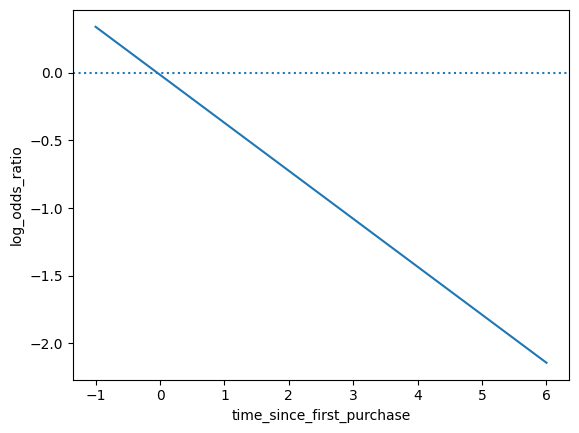

In [ ]:
# Update prediction data with log_odds_ratio
prediction_data["log_odds_ratio"] = np.log(prediction_data["odds_ratio"])

# Print the head
print(prediction_data.head())

fig = plt.figure()

# Update the line plot: log_odds_ratio vs. time_since_first_purchase
sns.lineplot(x="time_since_first_purchase",
             y="log_odds_ratio",
             data=prediction_data)

# Add a dotted horizontal line at log_odds_ratio = 0
plt.axhline(y=0, linestyle="dotted")

plt.show()

The linear relationship between predicted log odds ratio and the explanatory variable makes changes easier to reason about.

### Calculating the confusion matrix

A confusion matrix (occasionally called a confusion table) is the basis of all performance metrics for models with a categorical response (such as a logistic regression). It contains the counts of each actual response-predicted response pair. In this case, where there are two possible responses (churn or not churn), there are four overall outcomes.

True positive: The customer churned and the model predicted they would.

False positive: The customer didn't churn, but the model predicted they would.

True negative: The customer didn't churn and the model predicted they wouldn't.

False negative: The customer churned, but the model predicted they wouldn't.

In [ ]:
# Get the actual responses
actual_response = churn["has_churned"]

# Get the predicted responses
predicted_response = np.round(mdl_churn_vs_relationship.predict())

# Create outcomes as a DataFrame of both Series
outcomes = pd.DataFrame({"actual_response": actual_response,"predicted_response": predicted_response})

# Print the outcomes
print(outcomes.value_counts(sort = False))

actual_response  predicted_response
0                0.0                   112
                 1.0                    88
1                0.0                    76
                 1.0                   124
dtype: int64


The name 'confusion matrix' sounds scary, but it's just a table of counts. Simple!


### Drawing a mosaic plot of the confusion matrix

While calculating the performance matrix might be fun, it would become tedious if you needed multiple confusion matrices of different models. Luckily, the .pred_table() method can calculate the confusion matrix for you.

Additionally, you can use the output from the .pred_table() method to visualize the confusion matrix, using the mosaic() function.

[[112.  88.]
 [ 76. 124.]]


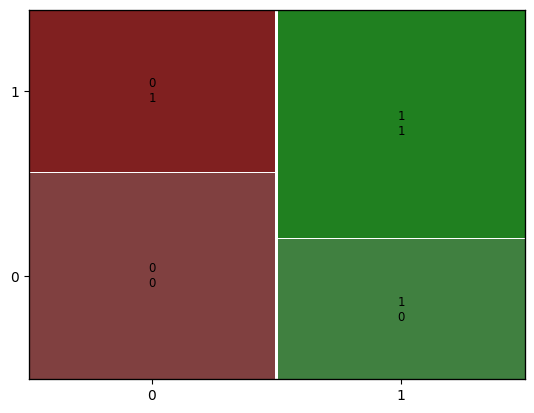

In [ ]:
# Import mosaic from statsmodels.graphics.mosaicplot
from statsmodels.graphics.mosaicplot import mosaic

# Calculate the confusion matrix conf_matrix
conf_matrix = mdl_churn_vs_relationship.pred_table()

# Print it
print(conf_matrix)

# Draw a mosaic plot of conf_matrix
mosaic(conf_matrix)

plt.show()

By using the .pred_table() method, getting and plotting the confusion matrix is easy.

### Measuring logistic model performance

As you know by now, several metrics exist for measuring the performance of a logistic regression model. In this last exercise, you'll manually calculate accuracy, sensitivity, and specificity. Recall the following definitions:

Accuracy is the proportion of predictions that are correct.

accuracy = TN + TP / TN + FN + FP + TP
 
Sensitivity is the proportion of true observations that are correctly predicted by the model as being true.
 
Sensitivity = TP / TP + FN

Specificity is the proportion of false observations that are correctly predicted by the model as being false.
 
Specificity = TN / TN + FP

True Positives (TP), True Negatives (TN), False Positives (FP), and False Negatives (FN)

In [ ]:
# Extract TN, TP, FN and FP from conf_matrix
TN = conf_matrix[0,0]
TP = conf_matrix[1,1]
FN = conf_matrix[1,0]
FP = conf_matrix[0,1]

# Calculate and print the accuracy
accuracy = ((TN + TP) / (TN + FN + FP + TP))
print("accuracy: ", accuracy)

# Calculate and print the sensitivity
sensitivity = (TP / (FN + TP))
print("sensitivity: ", sensitivity)

# Calculate and print the specificity
specificity = (TN / (TN + FP))
print("specificity: ", specificity)

accuracy:  0.59
sensitivity:  0.62
specificity:  0.56


Using these metrics, it becomes much easier to interpret and compare logistic regression models.

THE END